<a href="https://colab.research.google.com/github/vedantdave77/project.Orca/blob/master/Recurrent_Neural_Network/Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Attention Implementatin

Here, in this notebook I will implement the attention logic, which I learnt from some research papers, articles and learning videos.  

Attention is first introduced in 2014, and its revolution in image based context learning. I will implement scoring methods and context vector calculation in this notebook. 


## Attending Scoring 

For attention, I will assume three three hidden state output to measure score formulas. 
All the hidden nodes are coming from RNN's decoder stage(assumption). 




In [1]:
dec_hidden_state = [10,20,30]                                                   #  HIDDEN STATE [DECODER ]

Let's visualize this vector. 


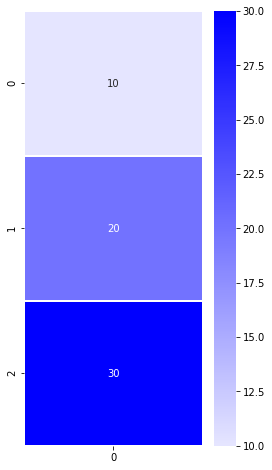

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize= (4,8))
sns.heatmap(np.transpose(np.matrix(dec_hidden_state)),annot = True, cmap = sns.light_palette("blue", as_cmap = True), linewidths=1)


In [9]:
annotation = [5,25,15]                                                          # ANNOTATION [ENCODER HIDDEN STATE]

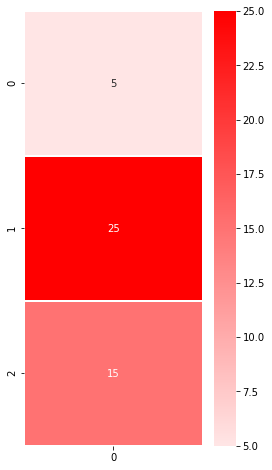

In [14]:
plt.figure(figsize = (4,8))
sns.heatmap(np.transpose(np.matrix(annotation)), annot=True, cmap=sns.light_palette('red', as_cmap=True),linewidths=1)

## Single Annotation Scores



In [16]:
def single_dot_attention_score(dec_hidden_state, enc_hidden_state):             #  [ PROCESS BETWEEN: HIDDEN STATE (ENCODER, DECODER)]
  return np.dot(dec_hidden_state , enc_hidden_state)

single_dot_attention_score(dec_hidden_state,annotation)

1000

## Annotation Matrix

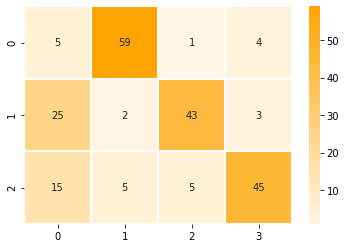

In [17]:
annotations = np.transpose([[5,25,15], [59,2,5], [1,43,5], [4,3,45.3]])

ax = sns.heatmap(annotations, annot = True, cmap = sns.light_palette('orange', as_cmap=True), linewidths= 1)

## Implementing dot notation


In [44]:
def dot_attention_score(dec_hidden_state,annotations):                          # MATRIX MULTIPLICATION BETWEEN HIDDEN STATE (ENCODER, DECODER)
  return np.matmul(np.transpose(dec_hidden_state),annotations)

attention_weights = dot_attention_score(dec_hidden_state,annotations)
attention_weights.reshape(4,1)
print(attention_weights)

[1000.  780. 1020. 1459.]


## Applying sortmax

In [45]:
def softmax(x):                                                                 # APPLYING SOFTMAX FUNCTION TO GET PROBABILITY
  x = np.array(x, dtype = np.float128)
  e_x = np.exp(x)
  return e_x/e_x.sum(axis = 0)

attention_weights = softmax(attention_weights)
print(attention_weights.shape)
attention_weights
attention_weights.reshape(4,1)
print(attention_weights.shape)


(4,)
(4,)


In [ ]:
ax = sns.heatmap(attention_weights, annot = True, cmap = sns.light_palette('green', as_cmap=True), linewidths= 1)

In [49]:
def apply_attention_score(attention_weights, annotations):                      # APPLY GENERAL PPROCESS : HIDDEN DECODER * WEIGHTS * HIDDEN ENCODER
  return attention_weights * annotations

applied_attention = apply_attention_score(attention_weights, annotations)
applied_attention

array([[2.27930693e-199, 7.67182697e-294, 2.21168078e-191,
        4.00000000e+000],
       [1.13965346e-198, 2.60061931e-295, 9.51022737e-190,
        3.00000000e+000],
       [6.83792079e-199, 6.50154828e-295, 1.10584039e-190,
        4.53000000e+001]], dtype=float128)

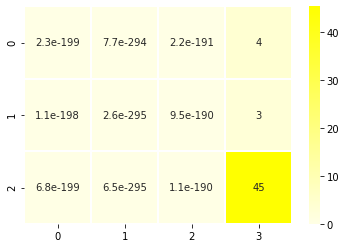

In [54]:
ax = sns.heatmap(applied_attention, annot=True, cmap=sns.light_palette("yellow", as_cmap=True), linewidths=1)

## Calculating the Attention Context Vector



In [55]:
def calculate_attention_vector(applied_attention):                              # ATTENTION CONTEXT VECTOR (== SUM OF ALL ENCODER HIDDEN STATES (STAGES OF HIDDEN STATES))
  return np.sum(applied_attention, axis=1)

attention_vector = calculate_attention_vector(applied_attention)
attention_vector

array([ 4. ,  3. , 45.3], dtype=float128)

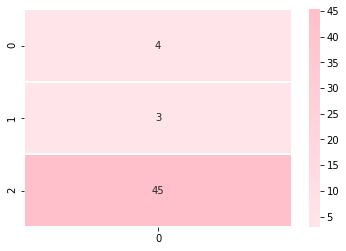

In [58]:
sns.heatmap(np.transpose(np.matrix(attention_vector)), annot=True, cmap=sns.light_palette("pink", as_cmap=True), linewidths= 1)

Here, the context vector, we can concatinate it with hidden state and gives the score. Here, score is favouring 2nd stage. So, it will be in intention.